# 1. Read Or Extract Data

In [91]:
import os
os.listdir(path="Dataset_Files")

['.gitkeep',
 '50_Startups.csv',
 'Churn_Modelling.csv',
 'Employee_attrition.csv',
 'Housing.csv',
 'Income&Expenditure.xlsx',
 'Mall_Customers.csv',
 'movie_review_test.csv',
 'movie_review_train.csv',
 'Passenger_test.csv',
 'Passenger_train.csv',
 'Pearson.txt',
 'Position_Salaries.csv',
 'Result_Datasets',
 'Salary_Data.csv',
 'Social_Network_Ads.csv',
 'Stud_part1.csv',
 'Stud_part2.csv',
 'winequality-red.csv',
 'winequality-white.csv']

In [92]:
import pandas as pd
data=pd.read_csv("Dataset_Files\\Housing.csv").iloc[:,1:]
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


# 2. EDA

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [94]:
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [95]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# 3. Feature Extraction

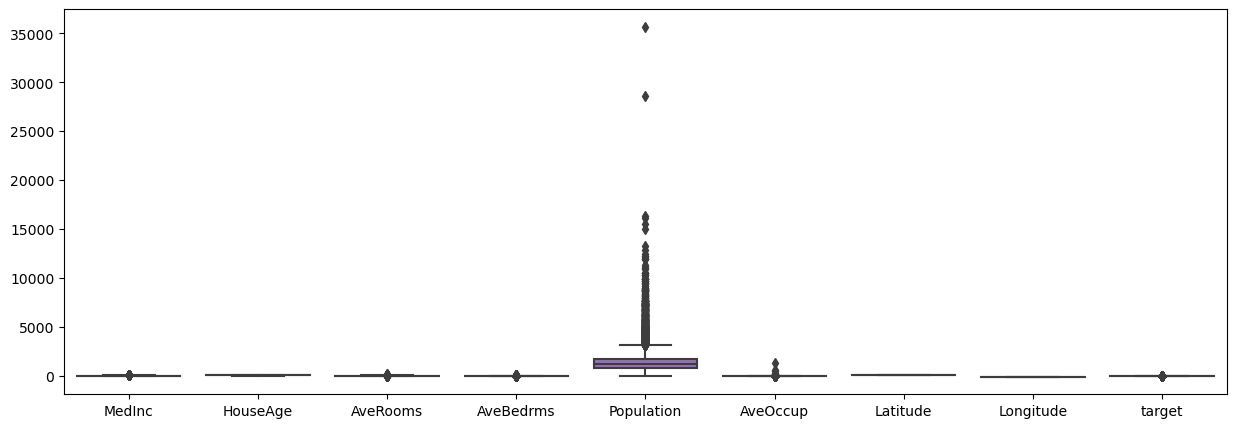

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=[15,5])
sns.boxplot(data)
plt.show()

<Axes: >

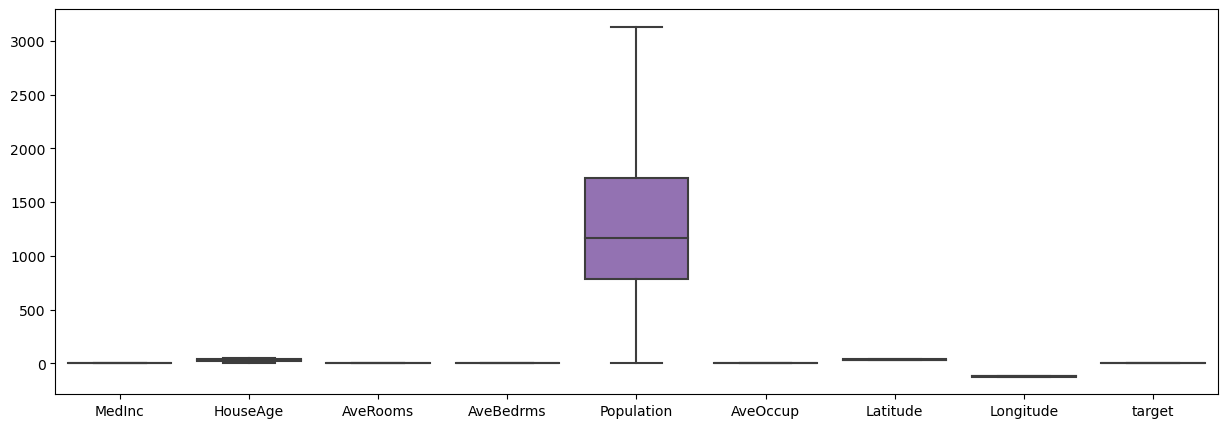

In [97]:
def f(i):
    q1=data[i].quantile(0.25)
    q3=data[i].quantile(0.75)
    IQR=q3-q1

    lb=q1-(IQR*1.5)
    ub=q3+(IQR*1.5)

    data.loc[data[i]<lb,i]=lb
    data.loc[data[i]>ub,i]=ub

for i in data.columns:
    f(i)

plt.figure(figsize=[15,5])
sns.boxplot(data)

In [98]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.013025,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.013025,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.257400,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.643100,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.846200,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.560300,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.556800,18.0,6.114035,1.239697,356.0,3.122807,39.49,-121.21
20637,1.700000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.867200,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [99]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

# 4 Model Building - Lasso

In [100]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [101]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [102]:
from sklearn.linear_model import Lasso
model_lasso=Lasso(alpha=0.1)
model_lasso.fit(x_train,y_train)

Lasso(alpha=0.1)

In [103]:
import joblib
joblib.dump(model_lasso,"New_model_lasso.pickle")
Load_model_lasso=joblib.load("New_model_lasso.pickle")

# 5 Model Prediction

In [104]:
y_pred=model_lasso.predict(x_test)
y_pred

array([0.89090109, 1.61250359, 2.49765167, ..., 3.76326936, 1.76647913,
       1.66123646])

# 6 Model evaluation

In [105]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

print(Load_model_lasso.score(x_test,y_test))
print(Load_model_lasso.score(x_train,y_train))

0.5824402288011552
0.582589846254884
0.7632757340927877
0.5392201414050801
0.5580392349266727


# 7 Result Visualization

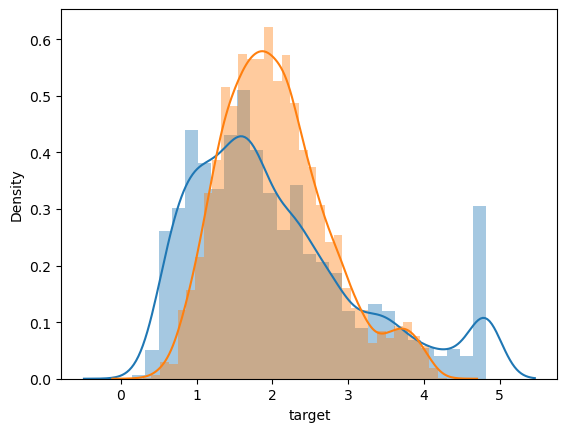

In [106]:
sns.distplot(y_test)
sns.distplot(y_pred)
plt.show()

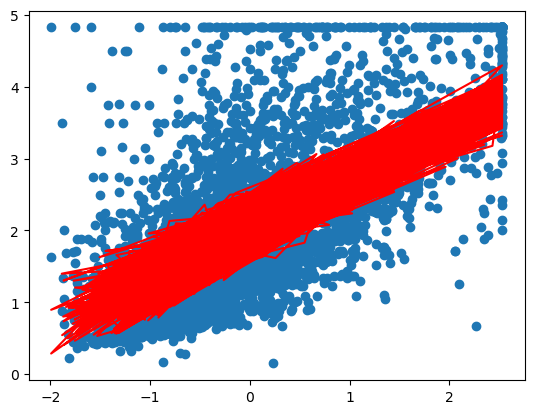

In [107]:
import matplotlib.pyplot as plt
plt.scatter(x_test[:,0],y_test)
plt.plot(x_test[:,0],y_pred,"-",c="r")
plt.show()